### Edgar Moises Hernandez-Gonzalez
#### 04/12/19
#### Clasificacion de RWE-DWT de MI-EEG con LSTM + CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, Conv1D, Flatten
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA01E.csv", header=None)

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [7]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [8]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [12]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
288/288 [==============================] - 0s 104us/sample - loss: 2.8366 - acc: 0.5208
kappa:  0.36111111111111116
confusion matrix:
 [[37 26  4  5]
 [14 52  5  1]
 [ 9  5 28 30]
 [10  3 26 33]]
(0.5139819763429471, 0.5208333333333334, 0.5155636324656099, None)


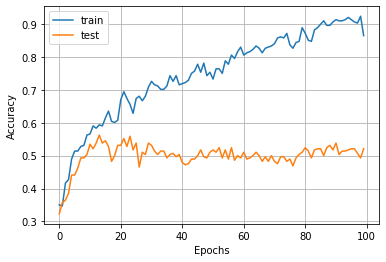

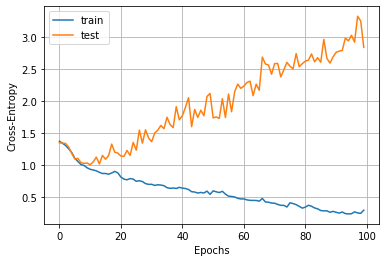

Iteration: 2
288/288 [==============================] - 0s 100us/sample - loss: 3.8474 - acc: 0.4861
kappa:  0.31481481481481477
confusion matrix:
 [[29 31  3  9]
 [14 51  5  2]
 [18  4 19 31]
 [11  6 14 41]]
(0.4786290354063834, 0.4861111111111111, 0.4725111102987993, None)


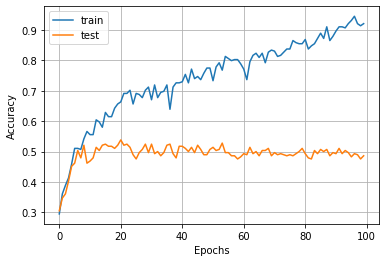

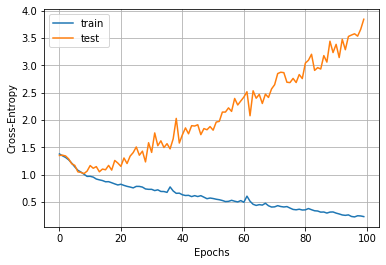

Iteration: 3
288/288 [==============================] - 0s 98us/sample - loss: 3.0015 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[29 30  5  8]
 [15 50  6  1]
 [12  7 27 26]
 [ 9  5 19 39]]
(0.4975858361441885, 0.5034722222222222, 0.4964912470749522, None)


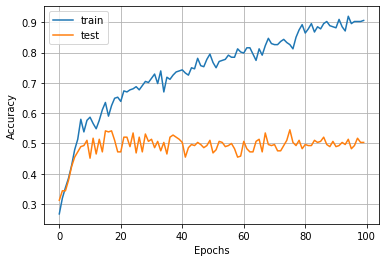

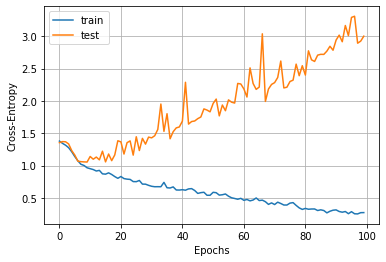

Iteration: 4
288/288 [==============================] - 0s 106us/sample - loss: 3.1494 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[36 25  6  5]
 [18 45  8  1]
 [15  5 32 20]
 [12  3 25 32]]
(0.5059489711626671, 0.5034722222222222, 0.5026120937885643, None)


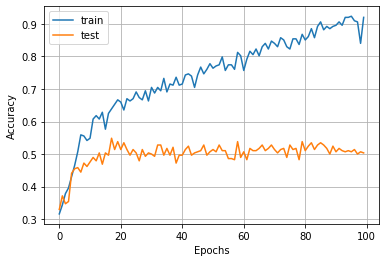

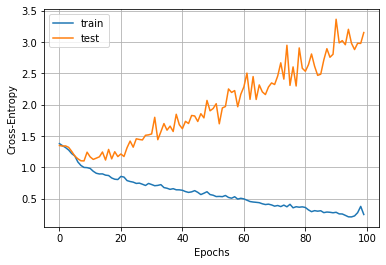

Iteration: 5
288/288 [==============================] - 0s 123us/sample - loss: 3.7454 - acc: 0.5312
kappa:  0.375
confusion matrix:
 [[34 31  3  4]
 [13 52  5  2]
 [19  4 28 21]
 [10  2 21 39]]
(0.5284438112646274, 0.53125, 0.5261870277037112, None)


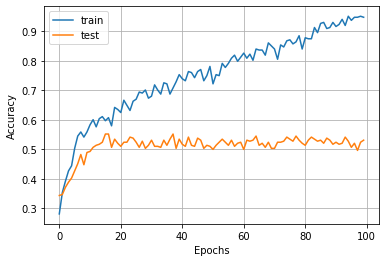

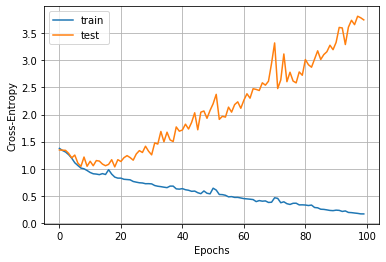

Iteration: 6
288/288 [==============================] - 0s 98us/sample - loss: 2.9445 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[37 23  5  7]
 [22 41  7  2]
 [12  5 27 28]
 [11  2 19 40]]
(0.5034205154468365, 0.5034722222222222, 0.5015608552521305, None)


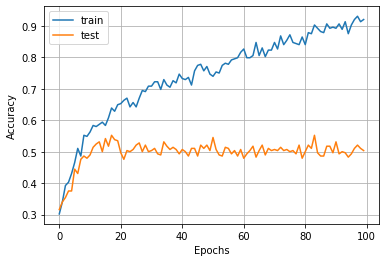

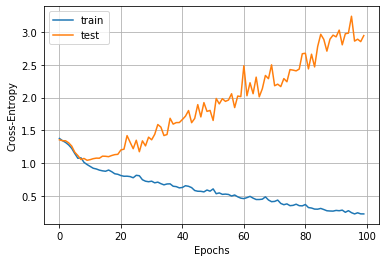

Iteration: 7
288/288 [==============================] - 0s 125us/sample - loss: 3.5855 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[28 37  2  5]
 [10 56  5  1]
 [14 10 29 19]
 [ 9  7 24 32]]
(0.5032110361596989, 0.5034722222222223, 0.49298880434131354, None)


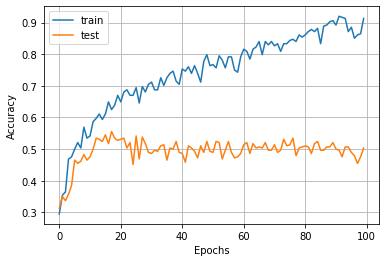

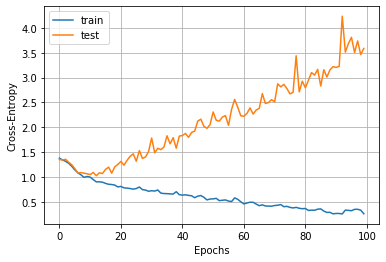

Iteration: 8
288/288 [==============================] - 0s 93us/sample - loss: 3.1640 - acc: 0.5000
kappa:  0.33333333333333337
confusion matrix:
 [[33 28  3  8]
 [15 49  7  1]
 [13  9 26 24]
 [ 9  5 22 36]]
(0.49497627559846447, 0.5, 0.49416350603293424, None)


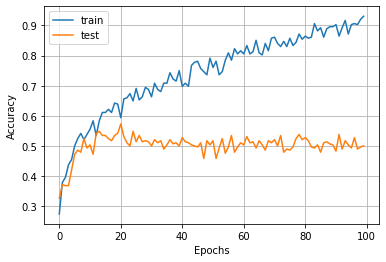

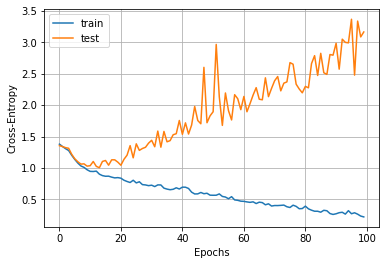

Iteration: 9
288/288 [==============================] - 0s 96us/sample - loss: 3.4066 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[40 21  3  8]
 [19 46  4  3]
 [22  3 14 33]
 [14  4 13 41]]
(0.4841979750648481, 0.4895833333333333, 0.4739057098739585, None)


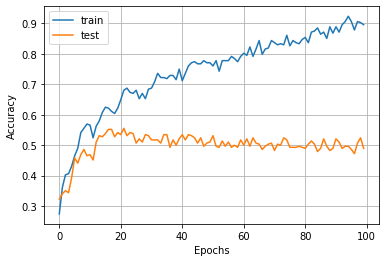

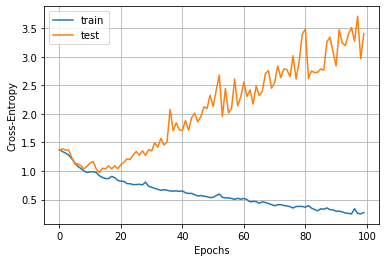

Iteration: 10
288/288 [==============================] - 0s 97us/sample - loss: 3.6167 - acc: 0.4722
kappa:  0.2962962962962963
confusion matrix:
 [[30 28  4 10]
 [14 50  5  3]
 [20  4 22 26]
 [14  3 21 34]]
(0.46542025661687225, 0.4722222222222222, 0.4651867255195087, None)


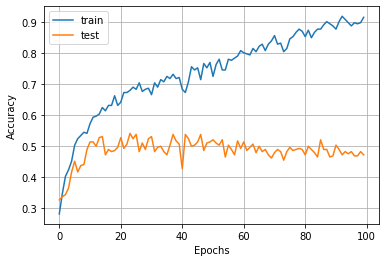

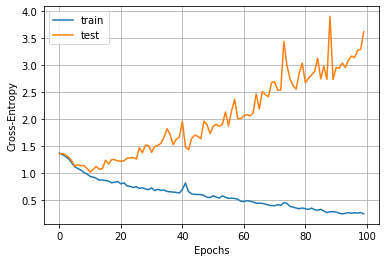


Resultados:
loss: [2.8365745544433594, 3.8473629421657987, 3.0014586448669434, 3.1494292153252497, 3.745428032345242, 2.9445140891604953, 3.585486981603834, 3.163976139492459, 3.406583587328593, 3.6166802512274847]
accuracy: [0.5208333, 0.4861111, 0.5034722, 0.5034722, 0.53125, 0.5034722, 0.5034722, 0.5, 0.48958334, 0.4722222]
kappa: [0.36111111111111116, 0.31481481481481477, 0.3379629629629629, 0.3379629629629629, 0.375, 0.3379629629629629, 0.3379629629629629, 0.33333333333333337, 0.3194444444444444, 0.2962962962962963]
precision: [0.5139819763429471, 0.4786290354063834, 0.4975858361441885, 0.5059489711626671, 0.5284438112646274, 0.5034205154468365, 0.5032110361596989, 0.49497627559846447, 0.4841979750648481, 0.46542025661687225]
recall: [0.5208333333333334, 0.4861111111111111, 0.5034722222222222, 0.5034722222222222, 0.53125, 0.5034722222222222, 0.5034722222222223, 0.5, 0.4895833333333333, 0.4722222222222222]
f1: [0.5155636324656099, 0.4725111102987993, 0.4964912470749522, 0.50261209

In [34]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(3,22)))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [35]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 3, 128)            77312     
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 1, 128)            49280     
_________________________________________________________________
flatten_19 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 127,108
Trainable params: 127,108
Non-trainable params: 0
_________________________________________________________________


In [36]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5014
std: (+/- 0.0159)
kappa: 0.3352
std: 0.0211
precision: 0.4976
recall: 0.5014
f1: 0.4941
